In [26]:
from csi.pipeline import *
from csi.util import *
import matplotlib.pyplot as plt
#%config Application.log_level='DEBUG'
files = [
    '/dataset/mazurkas/mazurka06-4/pid1263-04.mp3',
    '/dataset/mazurkas/mazurka06-4/pid9105-04.mp3',
    '/dataset/mazurkas/mazurka07-5/pid9093-05.mp3',
    '/dataset/mazurkas/mazurka07-5/pid9073-11.mp3'    
]

files = [
  '/dataset/YTCdataset/letitbe/v0.mp3',
  '/dataset/YTCdataset/letitbe/v1.mp3',
  '/dataset/YTCdataset/jbg/v5.mp3',
  '/dataset/YTCdataset/jbg/v6.mp3'
]

multipliers = [1, 2, 4, 8, 16, 32]
chroma_params = {'hop_length':2**10}
peaks_params = {'height': 0.05 , 'distance': 5 }
ssm_params = {'width':1, 'mode':'affinity', 'sym':True}
checkerboard = profiles.SSMCheckerboardBox(**ssm_params)

In [27]:

# multipliers = [m/4, m/3, m/2, m, m*2, m*3, m*4]
# song.chroma_cqt(hop_length=hop_length)
# simplefast.simpleself(chroma_stft, m)

#def calculate_matrix_profile_isft(song, m, hop_length):
#    chroma_stft = song.chroma_cqt(hop_length=hop_length)
#    istft = librosa.core.istft(chroma_stft)
#    return matrixProfile.stomp(istft, m)


#def plot_indexes(songs):

pipeline = Pipeline()
pipeline.use_feature(features.ChromagramCQT(**chroma_params))
pipeline.create_profiles(checkerboard, multipliers)
#pipeline.create_profiles(profiles.SimpleFast(), multipliers)
pipeline.detect_peaks(peak_detection.FindPeaks(**peaks_params))
pipeline.tokenize(tokenizers.NearestChildrenSegment(length=3, connections=3, n_bits=8))
pipeline.run(files)

Reading files
reading file /dataset/YTCdataset/letitbe/v0.mp3 


/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


reading file /dataset/YTCdataset/letitbe/v1.mp3 


/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


reading file /dataset/YTCdataset/jbg/v5.mp3 


/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


reading file /dataset/YTCdataset/jbg/v6.mp3 


/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Processing features
processing feature => /dataset/YTCdataset/letitbe/v0.mp3
processing feature => /dataset/YTCdataset/letitbe/v1.mp3
processing feature => /dataset/YTCdataset/jbg/v5.mp3
processing feature => /dataset/YTCdataset/jbg/v6.mp3
Creating profiles
creating profiles - 1 of 6 
creating profiles - 2 of 6 
creating profiles - 3 of 6 
creating profiles - 4 of 6 
creating profiles - 5 of 6 
creating profiles - 6 of 6 
creating profiles - 1 of 6 
creating profiles - 2 of 6 
creating profiles - 3 of 6 
creating profiles - 4 of 6 
creating profiles - 5 of 6 
creating profiles - 6 of 6 
creating profiles - 1 of 6 
creating profiles - 2 of 6 
creating profiles - 3 of 6 
creating profiles - 4 of 6 
creating profiles - 5 of 6 
creating profiles - 6 of 6 
creating profiles - 1 of 6 
creating profiles - 2 of 6 
creating profiles - 3 of 6 
creating profiles - 4 of 6 
creating profiles - 5 of 6 
creating profiles - 6 of 6 
Detecting peaks
Creating tokens
Done


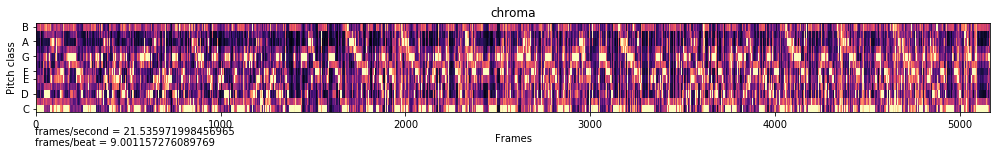

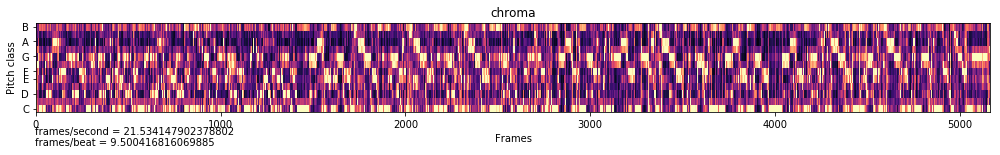

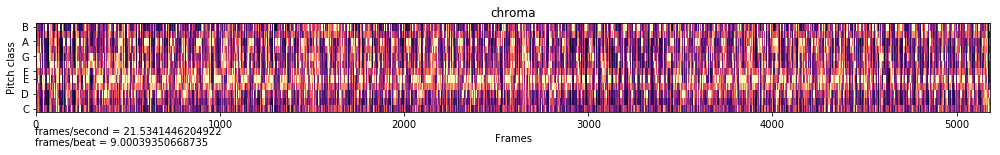

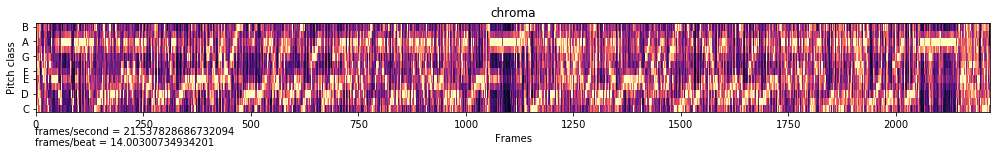

In [28]:
for song in pipeline.songs:
    plt.figure(figsize=(14, 2.5))
    plot_chroma(song)
    plt.tight_layout()

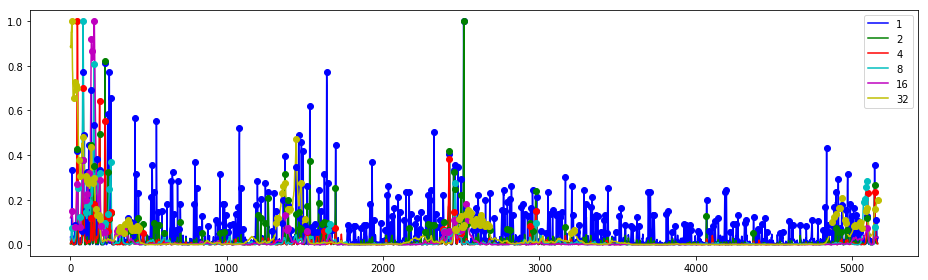

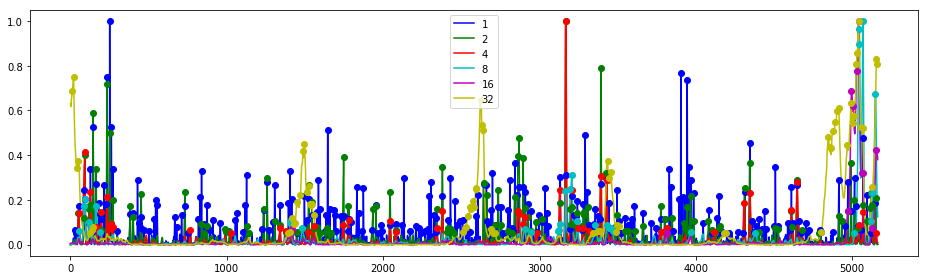

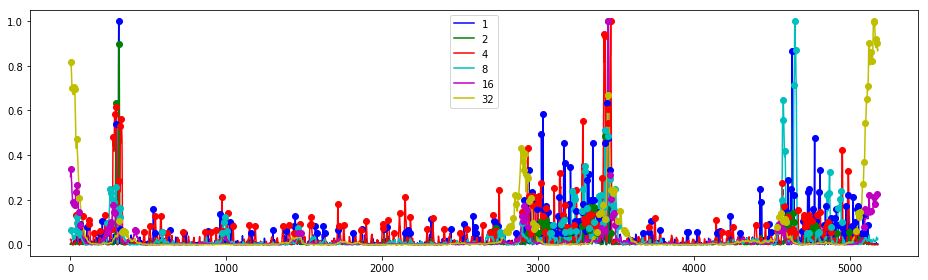

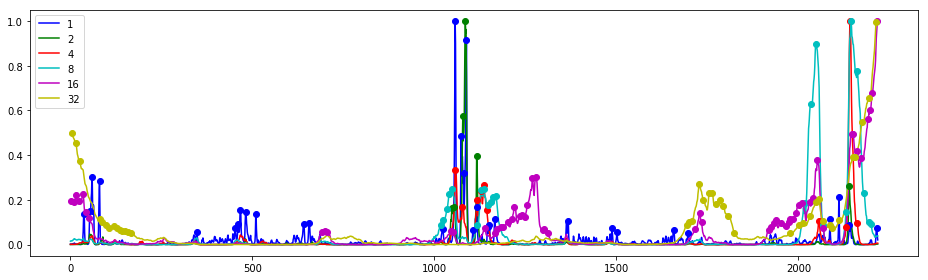

In [29]:
for song in pipeline.songs:
    plt.figure(figsize=(13, 4))
    plot_profiles(song.profiles)
    plot_peaks(song.peaks, song.profiles)
    plt.legend([round(i, 2) for i in multipliers])    
    plt.tight_layout()

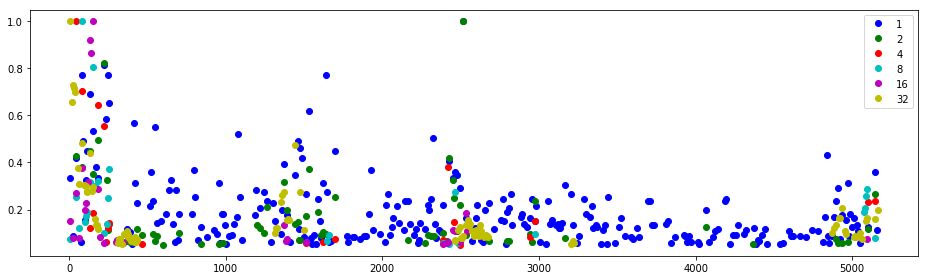

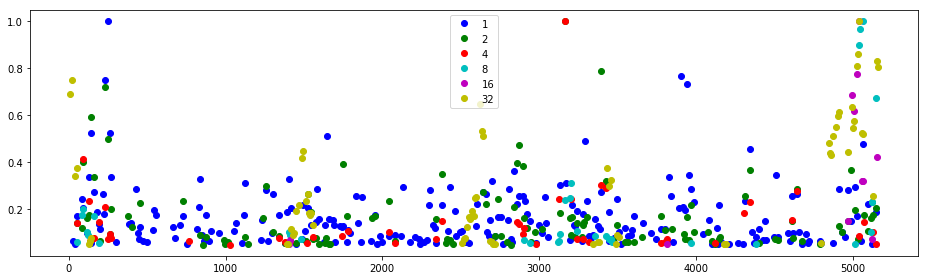

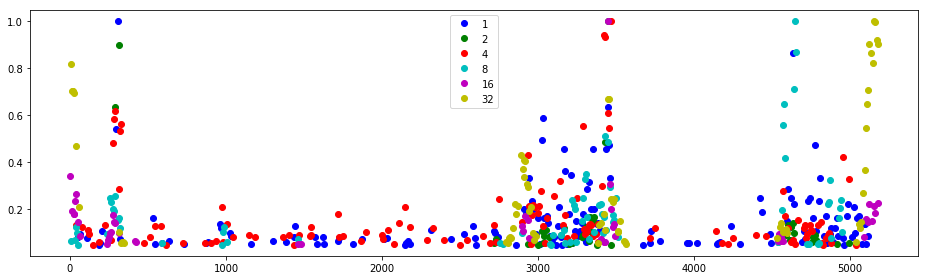

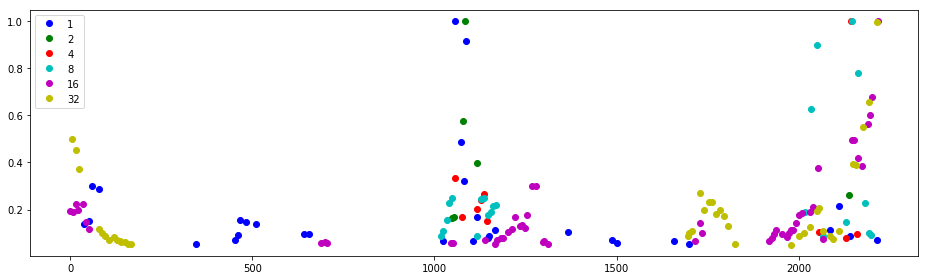

In [30]:
for song in pipeline.songs:
    plt.figure(figsize=(13, 4))
    plot_peaks(song.peaks, song.profiles)
    plt.legend([round(i, 2) for i in multipliers])    
    plt.tight_layout()

In [31]:
print('profile size: %s' % song.profiles[0].data.size)
print('profile max: %s' % max(song.profiles[0].data))
print('peaks: %s' % song.peaks[0].size)

profile size: 2219
profile max: 1.0
peaks: 31


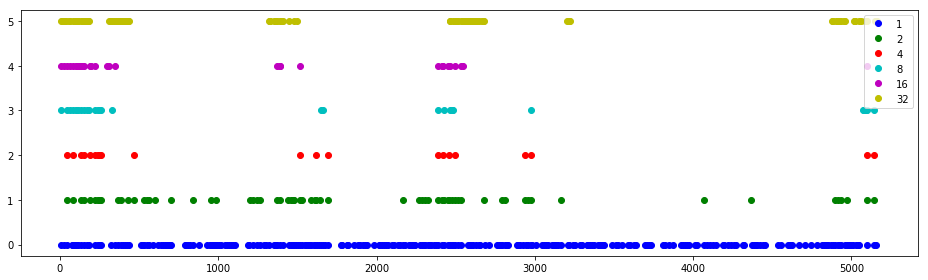

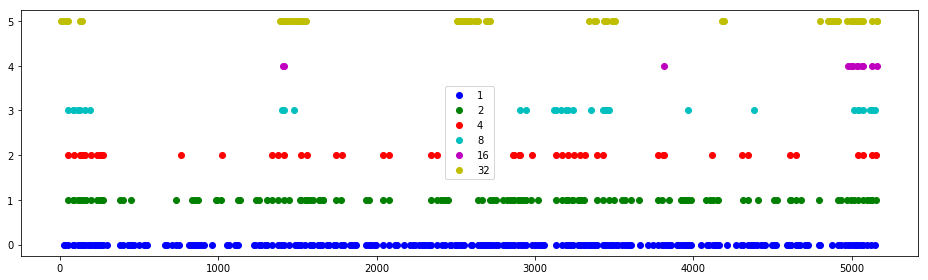

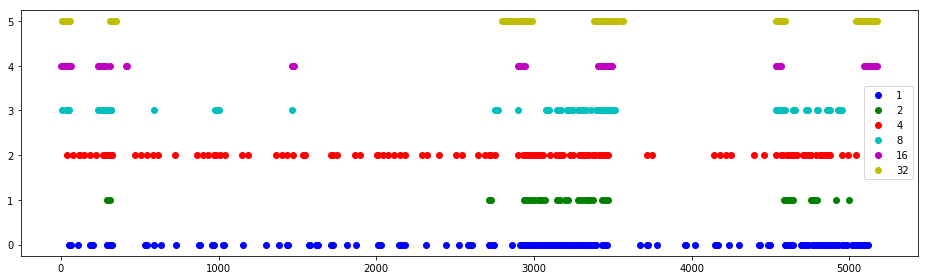

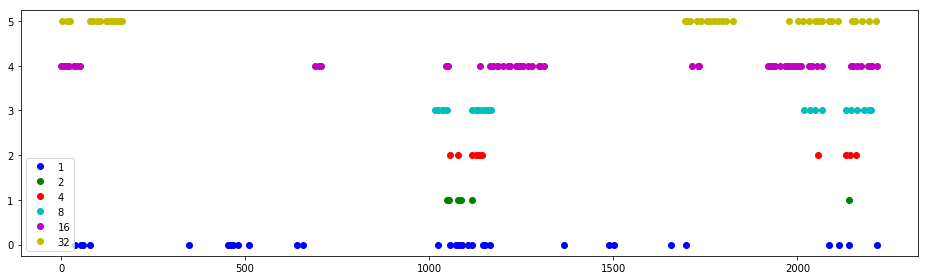

In [32]:
for song in pipeline.songs:
    plt.figure(figsize=(13, 4))
    plot_constellation(song.peaks)
    plt.legend([round(i, 2) for i in multipliers])
    plt.tight_layout()

In [35]:
def matches(song1, song2):
  s1 = set(song1.tokens)
  s2 = set(song2.tokens)
  return len([value for value in s1 if value in s2])


for song1 in pipeline.songs:
  for song2 in pipeline.songs:
    m = matches(song1, song2)
    s1 = set(song1.tokens)
    s2 = set(song2.tokens)
    print(song1.path, song2.path, m, m/len(s1), m/len(s2))

/dataset/YTCdataset/letitbe/v0.mp3 /dataset/YTCdataset/letitbe/v0.mp3 1854 1.0 1.0
/dataset/YTCdataset/letitbe/v0.mp3 /dataset/YTCdataset/letitbe/v1.mp3 160 0.08629989212513485 0.08879023307436182
/dataset/YTCdataset/letitbe/v0.mp3 /dataset/YTCdataset/jbg/v5.mp3 365 0.19687162891046386 0.13830996589617278
/dataset/YTCdataset/letitbe/v0.mp3 /dataset/YTCdataset/jbg/v6.mp3 91 0.04908306364617044 0.0896551724137931
/dataset/YTCdataset/letitbe/v1.mp3 /dataset/YTCdataset/letitbe/v0.mp3 160 0.08879023307436182 0.08629989212513485
/dataset/YTCdataset/letitbe/v1.mp3 /dataset/YTCdataset/letitbe/v1.mp3 1802 1.0 1.0
/dataset/YTCdataset/letitbe/v1.mp3 /dataset/YTCdataset/jbg/v5.mp3 238 0.1320754716981132 0.09018567639257294
/dataset/YTCdataset/letitbe/v1.mp3 /dataset/YTCdataset/jbg/v6.mp3 57 0.031631520532741396 0.0561576354679803
/dataset/YTCdataset/jbg/v5.mp3 /dataset/YTCdataset/letitbe/v0.mp3 365 0.13830996589617278 0.19687162891046386
/dataset/YTCdataset/jbg/v5.mp3 /dataset/YTCdataset/letitbe/v